# Presentation prep

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
df = pd.read_csv('dataset-immo3.csv')

In [5]:
## Discovering/removing duplicates:
# print("Printing duplicated rows:", df[df.duplicated()==True])
df.drop_duplicates(inplace = True) #removing the duplicated rows in dataframe
### Removing the rows with empty value
df.dropna(subset=['region'], how='any',inplace=True)
df.dropna(subset=['living_area'], how='any',inplace=True)
df.dropna(subset=['state_building'], how='any',inplace=True)
df.drop(df[(df.Type_property == "APARTMENT") & (df.floor.isnull())].index, inplace=True)
df.dropna(subset=['area_garden'], how='any',inplace=True)
# df.dropna(subset=['n_facades'], how='any',inplace=True)
# df.dropna(subset=['area_terrace'], how='any',inplace=True)
### Filling empty values
x = (df[(df.terrace==1) & (df.area_terrace.notnull())].area_terrace.median())
df["area_terrace"].fillna(x, inplace = True)
x = (df[(df.n_facades.notnull())].n_facades.median())
df["n_facades"].fillna(x, inplace = True)
df.isnull().sum()

url                    0
region                 0
province               0
district               0
postalCode             0
locality               0
street              2142
Type_property          0
subtype_property       0
price                  0
type_transaction       0
floor               5660
n_rooms                0
living_area            0
equipped_kitchen       0
furnished              0
fireplace              0
terrace                0
area_terrace           0
garden                 0
area_garden            0
land_surface           0
n_facades              0
n_floorCount        7389
swimming_pool          0
state_building         0
dtype: int64

In [ ]:
dfa = df[df.Type_property=='APARTMENT']
dfh = df[df.Type_property=='HOUSE']
df.shape

(11473, 26)

In [ ]:
# street = 2142/11473
# floor = 5660/11473
# floorcount = 7389/11473
# print(street)
# print(floor)
# print(floorcount)

0.18669920683343502
0.49333217118452016
0.6440338185304628


In [ ]:
df.corr()

,postalCode,price,floor,n_rooms,living_area,equipped_kitchen,furnished,fireplace,terrace,area_terrace,garden,area_garden,land_surface,n_facades,n_floorCount,swimming_pool
postalCode,1.000000,-0.087132,-0.016031,-0.056028,-0.081236,-0.064765,0.096375,0.011288,-0.082898,-0.044298,-0.060063,-0.003949,0.002945,-0.010548,-0.106414,-0.033735
price,-0.087132,1.000000,0.022811,0.424671,0.624837,0.037972,0.009982,-0.069114,0.144163,0.227239,0.083902,0.120618,0.205131,0.195745,0.076027,0.306920
floor,-0.016031,0.022811,1.000000,0.008299,0.011130,0.013988,0.003768,-0.011842,-0.010502,-0.001964,-0.032643,-0.000855,NaN,-0.019198,0.072926,0.004737
n_rooms,-0.056028,0.424671,0.008299,1.000000,0.691979,0.060948,-0.099835,0.045889,0.126767,0.226440,0.306181,0.109417,0.129094,0.276779,-0.051540,0.167568
living_area,-0.081236,0.624837,0.011130,0.691979,1.000000,0.051064,-0.093845,0.053543,0.107975,0.258078,0.244985,0.174321,0.200228,0.301607,-0.052925,0.287085
equipped_kitchen,-0.064765,0.037972,0.013988,0.060948,0.051064,1.000000,-0.001607,0.056254,0.120831,0.071649,0.095953,0.023449,0.000028,0.025700,0.034811,0.031301
furnished,0.096375,0.009982,0.003768,-0.099835,-0.093845,-0.001607,1.000000,-0.025372,-0.021766,-0.018616,-0.095285,-0.017180,-0.015931,-0.080312,0.103141,0.004570
fireplace,0.011288,-0.069114,-0.011842,0.045889,0.053543,0.056254,-0.025372,1.000000,-0.112775,-0.024249,-0.010572,0.003310,0.014013,0.046533,-0.017002,-0.035876
terrace,-0.082898,0.144163,-0.010502,0.126767,0.107975,0.120831,-0.021766,-0.112775,1.000000,0.368051,0.137964,0.043064,0.020515,0.080089,0.128230,0.072681
area_terrace,-0.044298,0.227239,-0.001964,0.226440,0.258078,0.071649,-0.018616,-0.024249,0.368051,1.000000,0.223010,0.087466,0.051685,0.191498,0.014351,0.161861


<AxesSubplot:>

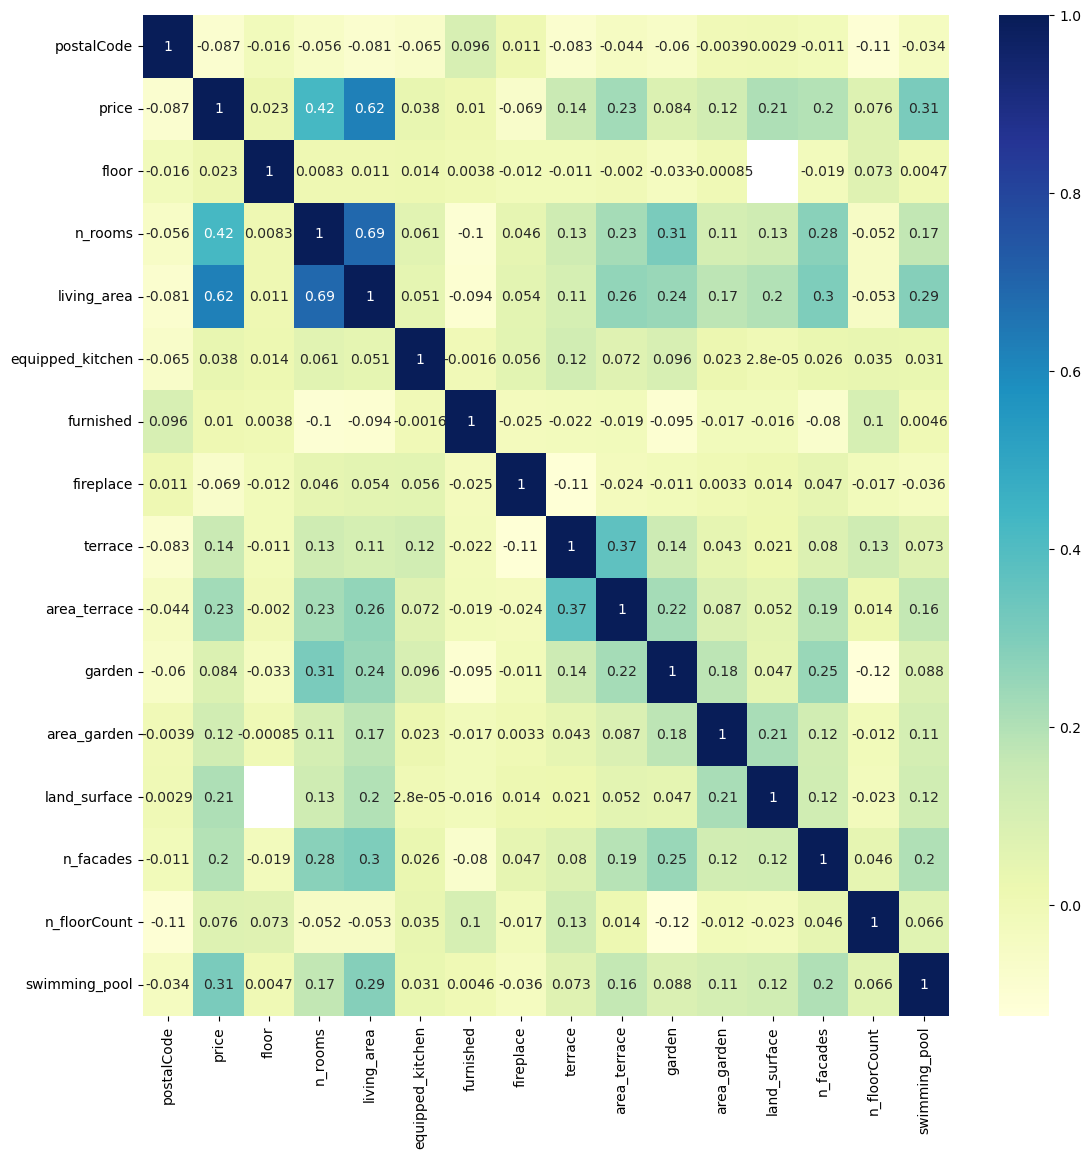

In [7]:
plt.figure(figsize=(13,13))
sns.heatmap(df.corr(),annot=True, cmap="YlGnBu")

In [ ]:
df.loc[12185].url

'https://www.immoweb.be/en/classified/house/for-sale/grez-doiceau/1390/10445148'

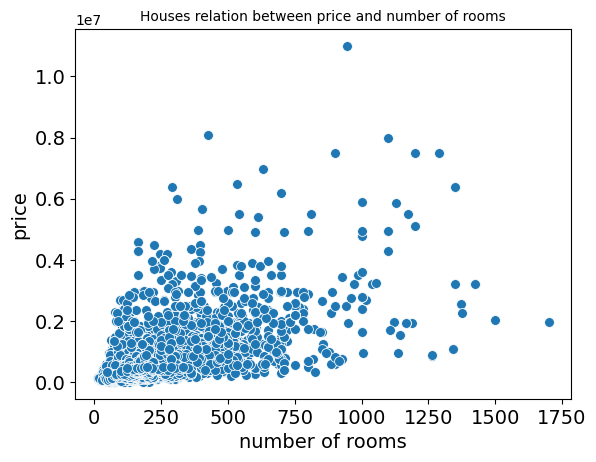

In [ ]:
# scatter plot
ax = sns.scatterplot(x='living_area', y='price', data=df, s=50)

# # notations indicating an outlier
# ax.annotate('Outlier', xy=(190,105), xytext=(183,102), fontsize=14,
#             arrowprops=dict(arrowstyle='->', ec='grey', lw=2), bbox = dict(boxstyle="round", fc="0.8"))
# ax.annotate('Outlier', xy=(165,85), xytext=(158,82), fontsize=14,
#             arrowprops=dict(arrowstyle='->', ec='grey', lw=2), bbox = dict(boxstyle="round", fc="0.8"))

# ticks 
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# labels and title
plt.xlabel('number of rooms', fontsize=14)
plt.ylabel('price', fontsize=14)
plt.title('Houses relation between price and number of rooms', fontsize=10);

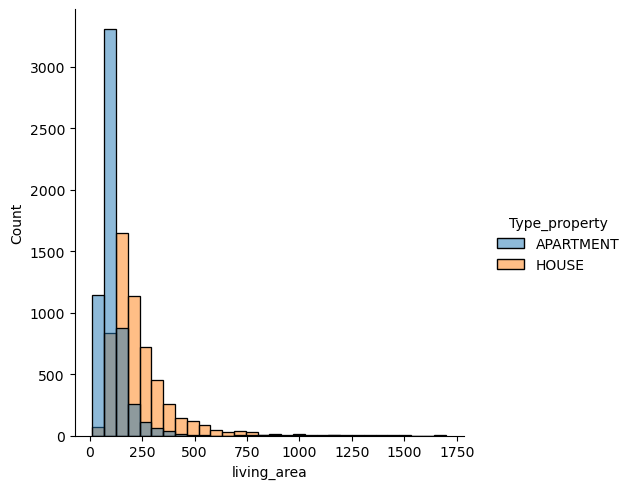

In [ ]:
sns.displot(df, x="living_area", bins=30, hue="Type_property")

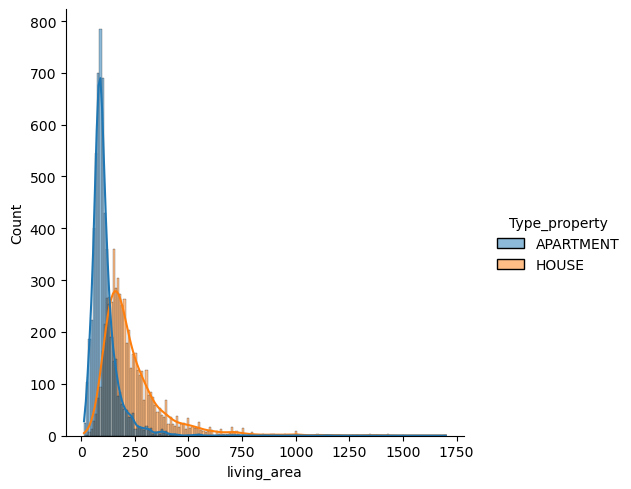

In [ ]:
sns.displot(df, x="living_area", hue="Type_property", kde=True)

/tmp/ipykernel_233480/3981064885.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xlabels)


Text(0.5, 1.0, 'Influence on the Price According to the Provinces')

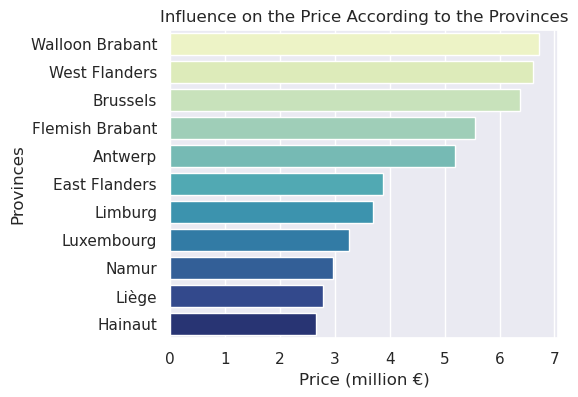

In [ ]:
#Using the new dataset to understand the influence of the price per province
sns.set(rc={'figure.figsize':(5,4)})
#Groupping the Provinces in order to be displayed from the highest value to the smallest one
df_agg = df.groupby(['province'])['price'].mean().reset_index().sort_values('price', ascending=False)
ax = sns.barplot(x='price', y='province', data=df, errorbar=None, order=df_agg['province'], palette='YlGnBu')
ax.set(xlabel='Price (million €)', ylabel='Provinces')
#Rounding the x axis tick labels --> It was 1000000, ...
xlabels = ['{:,.0f}'.format(x) for x in ax.get_xticks()/100000]
ax.set_xticklabels(xlabels)
#Setting a title
ax.axes.set_title("Influence on the Price According to the Provinces",fontsize=12)

/tmp/ipykernel_233480/3426280572.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xlabels)


Text(0.5, 1.0, 'Influence on the Price According to the District')

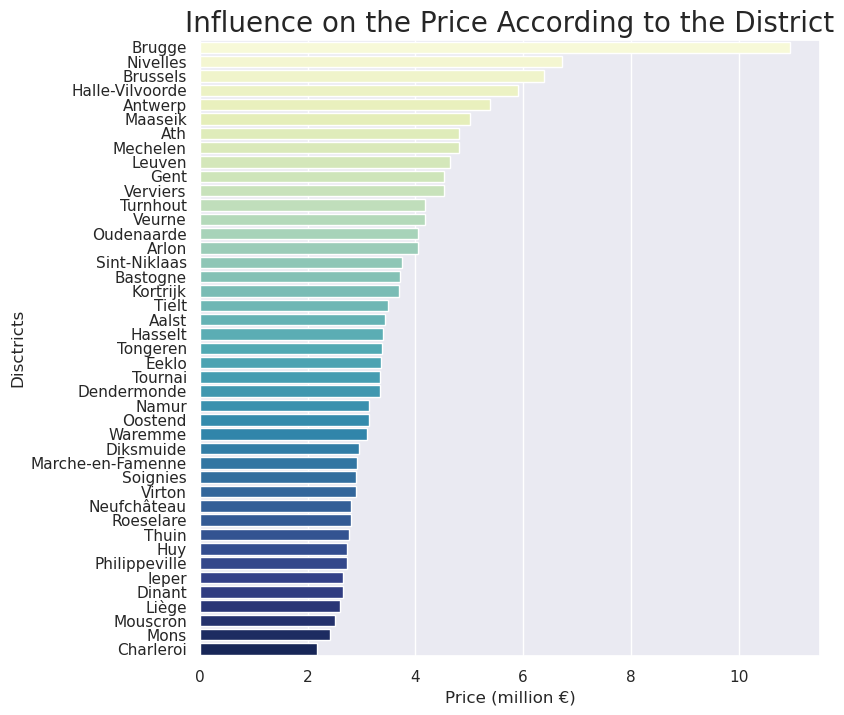

In [ ]:
#Using the new dataset to understand the influence of the price per province
sns.set(rc={'figure.figsize':(8,8)})
#Groupping the Provinces in order to be displayed from the highest value to the smallest one
df_agg = df.groupby(['district'])['price'].mean().reset_index().sort_values('price', ascending=False)
ax = sns.barplot(x='price', y='district', data=df, errorbar=None, order=df_agg['district'], palette='YlGnBu')
ax.set(xlabel='Price (million €)', ylabel='Disctricts')
#Rounding the x axis tick labels --> It was 1000000, ...
xlabels = ['{:,.0f}'.format(x) for x in ax.get_xticks()/100000]
ax.set_xticklabels(xlabels)b
#Setting a title
ax.axes.set_title("Influence on the Price According to the District",fontsize=20)